<a href="https://colab.research.google.com/github/rsudiplive/Credit-Card-fraud-detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We have a dataset of credit card companies where we have to find out **whether the credit card transaction was fraudulent or not**.

Generally in fraud detection, fraud transaction is relatively rare, only 6% of the transaction is fraudulent. There's a problem in overall accurary after fitting the model and we get a nearly overall of 100% accuracy. But, that's irrelevant since it generally depitcs the majority class proportion which are non-fraud and we get missed out on predicting the fraud ones. <br> 

This arises due to imbalanced classification of the classes either fraudulent(minority) or non-fraud(majority)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_score, recall_score,f1_score, confusion_matrix, accuracy_score, classification_report

In [2]:
cred_card = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/creditcard.csv')

In [3]:
cred_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,-1.949546,-0.494436,-0.353696,0.158729,-0.267239,0.234802,-0.754936,-0.343012,0.312175,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,-0.587786,0.317419,-0.408521,0.719639,0.226926,-0.296316,-0.040143,0.119177,1.057682,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,-1.753256,-1.331010,-0.061941,-0.405532,0.048083,-0.307503,0.289363,0.189739,0.022546,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,0.607629,1.048673,-0.514821,0.329538,-1.041463,-0.498797,-0.276887,0.114245,0.379447,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,0.173132,1.430172,0.915609,-0.336588,1.140171,-0.653626,-0.016567,0.066287,0.242537,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [4]:
cred_card.shape

(56962, 30)

In [5]:
cred_card['Target'].value_counts()

0    56864
1       98
Name: Target, dtype: int64

This clearly indicates the presence of unbalance classes with class 0(non-fraud) being the majority and the class 1(fraud) being the minority.

In [6]:
cred_card.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,0.013286,0.006610,-0.004263,0.001496,-0.003508,-0.003079,0.000141,-0.006501,0.001564,0.003176,-0.008330,-0.000041,-0.000320,-0.003711,0.002949,-0.001734,0.000030,0.003325,0.000766,-0.002685,-0.002253,-0.004938,0.004008,-0.001017,-0.000872,0.004513,0.001385,-0.001990,87.658797,0.001720
std,1.941231,1.611224,1.516853,1.419107,1.431731,1.359647,1.301800,1.201138,1.103688,1.095156,1.015901,0.997691,0.994583,0.954667,0.912533,0.878088,0.841764,0.836135,0.819729,0.764450,0.735871,0.730301,0.621623,0.604191,0.521003,0.481857,0.416750,0.325640,258.042879,0.041443
min,-36.510583,-47.429676,-48.325589,-5.560118,-113.743307,-20.054615,-28.215112,-41.484823,-9.481456,-20.949192,-4.009307,-18.553697,-3.848943,-19.214325,-4.092344,-12.661696,-21.710188,-8.859452,-4.619034,-54.497720,-21.620120,-8.593642,-32.828995,-2.822684,-8.696627,-1.778061,-8.878665,-15.430084,0.000000,0.000000
25%,-0.908591,-0.600208,-0.893961,-0.847617,-0.694059,-0.770145,-0.551096,-0.211190,-0.642072,-0.535121,-0.768230,-0.405703,-0.648105,-0.423884,-0.575757,-0.471831,-0.484962,-0.494863,-0.455728,-0.211598,-0.230210,-0.549030,-0.160179,-0.356599,-0.315738,-0.322766,-0.070204,-0.052351,5.615000,0.000000
50%,0.036251,0.061840,0.170910,-0.022094,-0.051828,-0.278939,0.039155,0.019903,-0.052607,-0.095676,-0.043537,0.140321,-0.013682,0.046713,0.051535,0.066099,-0.066498,-0.005457,0.003560,-0.061739,-0.032379,-0.000329,-0.009334,0.040045,0.018074,-0.047859,0.001451,0.011354,21.900000,0.000000
75%,1.319727,0.801163,1.016897,0.738688,0.615454,0.392801,0.569769,0.324905,0.599634,0.453059,0.728512,0.616856,0.668013,0.487491,0.648842,0.520843,0.402614,0.502115,0.458875,0.131241,0.184809,0.524484,0.149985,0.437657,0.348895,0.245286,0.090737,0.077483,77.500000,0.000000
max,2.446505,18.902453,3.985446,15.304184,29.016124,73.301626,120.589494,18.282168,10.370658,15.236028,12.018913,4.846452,7.126883,7.421944,8.877742,17.315112,7.733456,4.093440,5.591971,19.746453,22.614889,6.790452,20.803344,4.584549,7.519589,3.517346,31.612198,22.620072,25691.160000,1.000000


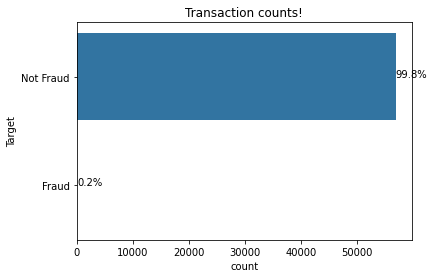

In [7]:
ax = sns.countplot(y='Target',data=cred_card)

total = len(cred_card['Target'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)  
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

ax.set_yticklabels(['Not Fraud','Fraud'])
plt.title('Transaction counts!')
plt.show()

Around 99.8% transactions are not fraud and only 0.2% of them are fraud. We can now surely feel the presence of an imbalance classes in the dataset.

One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

Let’s do this experiment, using simple XGBClassifier:

In [8]:
#independent variable:
X= cred_card.iloc[:,:-1]

#dependent variable:
y= cred_card.iloc[:,-1]

In [9]:
#Now splitting the dataset into training and testing set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

Distribution of classes of dependent variable in train :
0    38097
1       67
Name: Target, dtype: int64


In [11]:
print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in test :
0    18767
1       31
Name: Target, dtype: int64


In [12]:
#fitting a knn model before handling imbalance classification and lets check the roc_auc_score(not accuracy due to large majority class)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2) 
#p=2 indicates calculating Euclidean distance.
#p=1 "          "          Manhattan distance.

classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
y_pred= classifier.predict(X_test)

In [14]:
accuracy_score(y_pred,y_test) #very high accuracy(not a good metric for imbalanced dataset)

0.9990956484732418

In [15]:
confusion_matrix(y_pred,y_test)

array([[18766,    16],
       [    1,    15]])

The confusion matrix clearly tells that the model has failed to classify the fraud ones. Only it could predict 15 of them as fraud while it's around 18766 of them, predicted as non-fraud.

To handle imbalanced dataset or to made our model work well on an imbalanced dataset , we need to measure the model's performance in a well descriptive manner , we can't just go and measure the accuracy of the model , because we have 99% of data from class 0 , so it doesn't even matter that how well our model performed on minority class it's accuracy is always going to be very descent. so we should choose estimater wisely in case of Imbalanced dataset.

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18782
           1       0.48      0.94      0.64        16

    accuracy                           1.00     18798
   macro avg       0.74      0.97      0.82     18798
weighted avg       1.00      1.00      1.00     18798



In [17]:
#roc_auc_score:

roc_auc_score(y_pred,y_test)

0.9683240602704717

## How to handle Imbalanced Dataset?

**Random Sampling:** <br>
One of the most widely used technique to handle imbalanced data (to make data balanced ) is Random sampling.<br>

Random sampling majorly performed in two ways:

1. **Random Under sampling**: This involves randomly selecting samples from the majority class and removing them from the training dataset.
2. **Random Over sampling**: Random oversampling involves randomly selecting examples from the minority class, with replacement and adding them to the training dataset.

Despite the advantage of balancing classes, these techniques also have their own weaknesses.

The simplest implementation of **over-sampling** is to duplicate random records from the minority class, which can cause **overfitting**.

In **under-sampling**, the simplest technique involves removing random records from the majority class, which can cause **loss of information**.

## Let’s implement this with the credit card fraud detection example.

In [18]:
class_count0, class_count1 = cred_card['Target'].value_counts()

In [19]:
print(class_count0)
print(class_count1)

56864
98


In [20]:
#seperating class

class_0 = cred_card[cred_card['Target']==0]
class_1 = cred_card[cred_card['Target']==1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (56864, 30)
class 1: (98, 30)


## 1. Random Under-Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

In [21]:
class_0_under = class_0.sample(class_count1)
test_under = pd.concat([class_0_under,class_1],axis=0)

In [22]:
test_under['Target'].value_counts()

1    98
0    98
Name: Target, dtype: int64

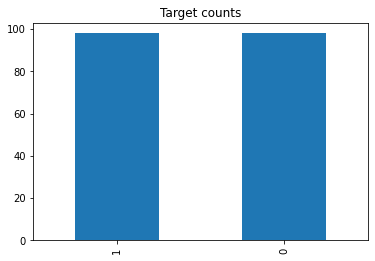

In [23]:
test_under['Target'].value_counts().plot(kind='bar',title= 'Target counts')

Now, we have a undersampled the classes with equal proportion of both the classes.

Alternative: Let's import the imblearn(imbalanced learn) library to do the undersampling 

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(cred_card.iloc[:,0:-1], cred_card['Target'])

print('Original dataset shape:', len(cred_card))
print('Resampled dataset shape', len(y_rus))
print('Resampled dataset shape', len(x_rus))

Original dataset shape: 56962
Resampled dataset shape 196
Resampled dataset shape 196


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 2. Random Over-Sampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

In [25]:
class_1_over = class_1.sample(class_count0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [26]:
test_over['Target'].value_counts()

1    56864
0    56864
Name: Target, dtype: int64

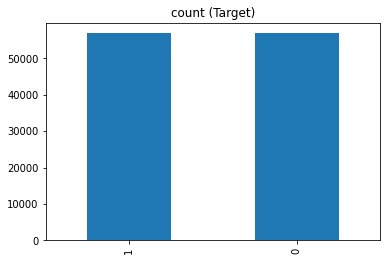

In [27]:
test_over['Target'].value_counts().plot(kind='bar', title='count (Target)')

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(cred_card.iloc[:,0:-1], cred_card['Target'])
print('Original dataset shape:', len(cred_card))
print('Resampled dataset shape', len(y_ros))

Original dataset shape: 56962
Resampled dataset shape 113728


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 3. Synthetic Minority Oversampling Technique (SMOTE)

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

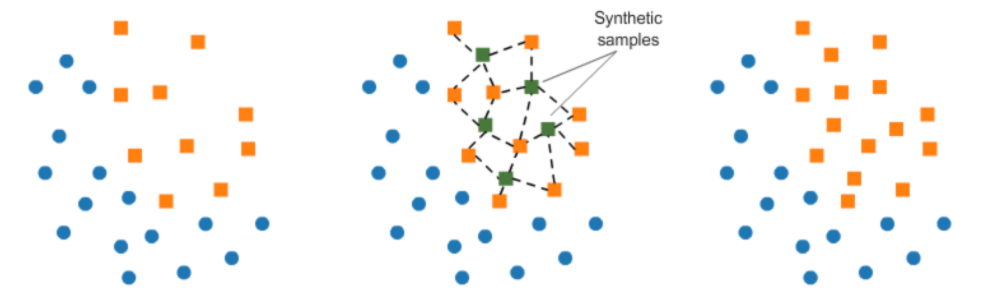

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X_train,y_train) #cred_card.iloc[:,:-1], cred_card['Target']
print('Original dataset shape', len(cred_card))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 56962
Resampled dataset shape 76194


In [30]:
print("Label 1, After using SMOTE: {}".format(sum(y_smote==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_smote==0)))

Label 1, After using SMOTE: 38097
Label 0, After using SMOTE: 38097


### 4. Penalize Algorithms (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is **Penalized-SVM**.

During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

In [31]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))

ROCAUC score: 0.9137599114437319
Accuracy score: 0.9885626130439409


## Implementing SMOTE with other models and checking the best model:

Logistic Regression + SMOTE

In [32]:
clf_lr = LogisticRegression()
clf_lr.fit(x_smote,y_smote)
y_pred_lr = clf_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf_lr = confusion_matrix(y_test, y_pred_lr)
clf_report_lr = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Logistic Regression : 0.9825513352484306
Confusion Matrix : 
[[18443   324]
 [    4    27]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18767
           1       0.08      0.87      0.14        31

    accuracy                           0.98     18798
   macro avg       0.54      0.93      0.57     18798
weighted avg       1.00      0.98      0.99     18798



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
auc_score=roc_auc_score(y_test, y_pred_lr)
print('AUC =' ,auc_score)

AUC = 0.9268516974717117


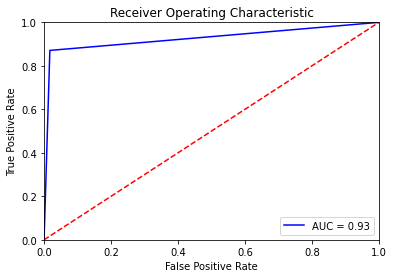

In [34]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random forest+SMOTE

In [35]:
random_clf = RandomForestClassifier()
random_clf.fit(x_smote, y_smote)
y_pred_random_clf = random_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_random_clf)
conf = confusion_matrix(y_test, y_pred_random_clf)
clf_report = classification_report(y_test, y_pred_random_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9994680285136717
Confusion Matrix : 
[[18762     5]
 [    5    26]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18767
           1       0.84      0.84      0.84        31

    accuracy                           1.00     18798
   macro avg       0.92      0.92      0.92     18798
weighted avg       1.00      1.00      1.00     18798



In [36]:
auc_score=roc_auc_score(y_test, y_pred_random_clf)
print('AUC =' ,auc_score)

AUC = 0.9192216261557263


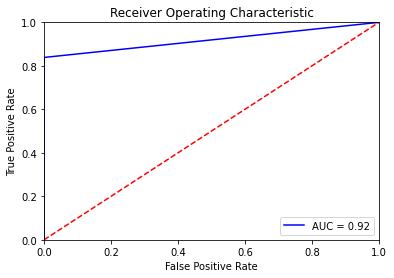

In [37]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_random_clf)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting + SMOTE

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb = GradientBoostingClassifier()
modelgb.fit(x_smote,y_smote)

y_predgb= modelgb.predict(X_test)

acc_gb = accuracy_score(y_test, y_predgb)
confgb = confusion_matrix(y_test, y_predgb)
clf_reportgb = classification_report(y_test, y_predgb)

print(f"Accuracy Score of Gradient Boosting classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{confgb}")
print(f"Classification Report : \n{clf_reportgb}")

Accuracy Score of Gradient Boosting classifier is : 0.99680817108203
Confusion Matrix : 
[[18714    53]
 [    7    24]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18767
           1       0.31      0.77      0.44        31

    accuracy                           1.00     18798
   macro avg       0.66      0.89      0.72     18798
weighted avg       1.00      1.00      1.00     18798



In [39]:
auc_score=roc_auc_score(y_test, y_predgb)
print('AUC =' ,auc_score)

AUC = 0.885684721121667


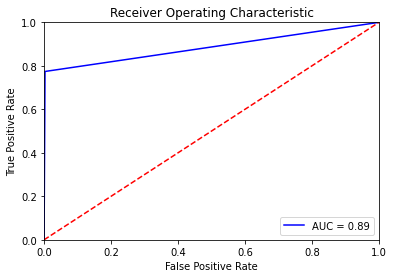

In [40]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predgb)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XG Boost + SMOTE

In [41]:
test_x = X_test.values

In [42]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(x_smote, y_smote)

# predict
xgb_y_predict = xgb_model.predict(test_x)

print('ROCAUC score:', roc_auc_score(y_test, xgb_y_predict))
print('Accuracy score:', accuracy_score(y_test, xgb_y_predict))

ROCAUC score: 0.9176763605298939
Accuracy score: 0.9963825938929673


In [43]:
acc_xgb = accuracy_score(y_test, xgb_y_predict)
conf_xgb = confusion_matrix(y_test, xgb_y_predict)
clf_report_xgb = classification_report(y_test, xgb_y_predict)

print(f"Accuracy Score of Random Forest is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

Accuracy Score of Random Forest is : 0.9963825938929673
Confusion Matrix : 
[[18704    63]
 [    5    26]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18767
           1       0.29      0.84      0.43        31

    accuracy                           1.00     18798
   macro avg       0.65      0.92      0.72     18798
weighted avg       1.00      1.00      1.00     18798



In [44]:
#auc score:
auc_score=roc_auc_score(y_test, xgb_y_predict)
print('AUC =' ,auc_score)

AUC = 0.9176763605298939


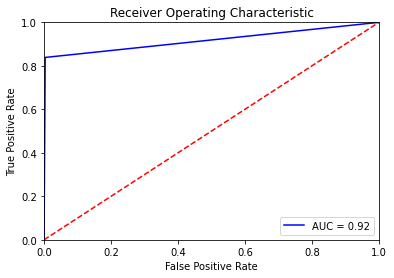

In [45]:
#ROC-AUC curve:
fpr, tpr, threshold = metrics.roc_curve(y_test, xgb_y_predict)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ADABOOST + SMOTE

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_smote,y_smote)
y_pred_ab= ada_model.predict(X_test)

acc_ab = accuracy_score(y_test, y_pred_ab)
conf_ab = confusion_matrix(y_test, y_pred_ab)
clf_report_ab = classification_report(y_test, y_pred_ab)

print(f"Accuracy Score of Gradient Boosting classifier is : {acc_ab}")
print(f"Confusion Matrix : \n{conf_ab}")
print(f"Classification Report : \n{clf_report_ab}")

Accuracy Score of Gradient Boosting classifier is : 0.992658793488669
Confusion Matrix : 
[[18635   132]
 [    6    25]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18767
           1       0.16      0.81      0.27        31

    accuracy                           0.99     18798
   macro avg       0.58      0.90      0.63     18798
weighted avg       1.00      0.99      1.00     18798



In [47]:
#auc score:
auc_score=roc_auc_score(y_test, y_pred_ab)
print('AUC =' ,auc_score)

AUC = 0.8997089950273042


## Using automatic anomaly detection techniques to fit the model by using Isolation Forest, Local Outlier factor & OneClassSVM

In [48]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = cred_card[cred_card['Target']==1]
print(f'The fraud transactions are:',len(Fraud))
Valid = cred_card[cred_card['Target']==0]
print(f'The non-fraud transactions are:',len(Valid))
outlier_fraction = len(Fraud)/float(len(Valid))
print(f'The outlier fraction is:',outlier_fraction)

The fraud transactions are: 98
The non-fraud transactions are: 56864
The outlier fraction is: 0.0017234102419808666


### Isolation Forest:

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

### Local Outlier Factor:

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

In [49]:
#Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination='auto',random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination='auto'),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
    }

In [50]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 189
Accuracy Score :
0.9966819985253327
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.46      0.32        98

    accuracy                           1.00     56962
   macro avg       0.62      0.73      0.66     56962
weighted avg       1.00      1.00      1.00     56962

Local Outlier Factor: 2390
Accuracy Score :
0.9580422035743127
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.02      0.48      0.04        98

    accuracy                           0.96     56962
   macro avg       0.51      0.72      0.51     56962
weighted avg       1.00      0.96      0.98     56962

Support Vector Machine: 7778
Accuracy Score :
0.863452828201257
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.86 

## Inferences: <br>

1. We saw that **XGBoost** performed relatively well with applying SMOTE than other models like adaboost & logistic regression which has higher AUC score of 0.93 than other models signifies a better performance with SMOTE.
2. **Isolation Forest** detected 189 errors versus Local Outlier Factor detecting 2390 errors vs. SVM detecting 7778 errors.
3. Isolation forest exhibits a better acuuracy with relatively good f1-score for both the classes and can be considered a better anomaly detection technique. Performs way better than the other automatic outlier removal techniques like Local Outlier Factor(LOF), OneClassSVM. 

## Using SMOTE + Deep Neural Network to solve this!

In [52]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [53]:
# DNN
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]), #input layer
        keras.layers.Dense(512, activation='relu'),#hidden layers
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5), 
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [54]:
# DNN (fit and validation)
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
120/120 [==============================] - 3s 19ms/step - loss: 0.8515 - accuracy: 0.7778 - val_loss: 0.0519 - val_accuracy: 0.9874
Epoch 2/20
120/120 [==============================] - 2s 20ms/step - loss: 0.0747 - accuracy: 0.9763 - val_loss: 0.0337 - val_accuracy: 0.9908
Epoch 3/20
120/120 [==============================] - 2s 19ms/step - loss: 0.0680 - accuracy: 0.9816 - val_loss: 0.0308 - val_accuracy: 0.9891
Epoch 4/20
120/120 [==============================] - 2s 18ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0280 - val_accuracy: 0.9968
Epoch 5/20
120/120 [==============================] - 2s 18ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.0215 - val_accuracy: 0.9970
Epoch 6/20
120/120 [==============================] - 2s 18ms/step - loss: 0.0545 - accuracy: 0.9898 - val_loss: 0.1139 - val_accuracy: 0.9944
Epoch 7/20
120/120 [==============================] - 2s 18ms/step - loss: 0.0740 - accuracy: 0.9799 - val_loss: 0.0222 - val_accuracy: 0.9957

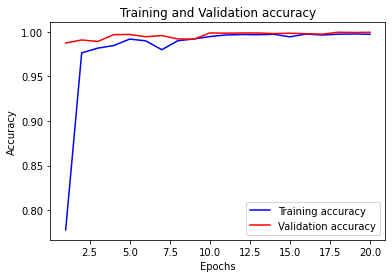

In [63]:
import matplotlib.pyplot as plt
epochs= range(1,21)

plt.plot(epochs, fit.history['accuracy'], color='blue',label='Training accuracy')
plt.plot(epochs, fit.history['val_accuracy'], color='red',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph of the **training loss vs. validation loss** over the number of epochs. This will help the developer of the model to make informed decisions about the architectural choices that need to be made. <br>

The gap between training and validation accuracy is a clear indication of overfitting. A **good fit** is identified by a training and validation loss that decreases to a **point of stability** with a minimal gap between the two final loss values. Looking at this graph clearly tells that the model has fitted very well.

In [60]:
y_pred_nn = model.predict_classes(val_ds)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [61]:
print('ROCAUC score:', roc_auc_score(y_test, y_pred_nn))
print('Accuracy score:', accuracy_score(y_test, y_pred_nn))

ROCAUC score: 0.9994059405940594
Accuracy score: 0.9994094100662773


In [51]:
#This notebook is contributed by Sudip Roy